# Multivariate Regression

This is similar to linear regression, the only difference is that there are multiple features on which the the output is depended. The equation for linear regression is:
## Y = α + βX + e
where, β is the slope and α is the y intercept

The equation for polynomial regression is:
## Y = α + β1X1 + β2X2 +β3X3 + ...... + βnXn + e
where, βn are the slopes which make up for that individual feature and α is the y intercept.

In this instance we'll predict the pressure a plastic can bear given the strength and temperature of that plastic.
Without going into technicalities of materials we'll just train the model to learn and try to predict the correct answer, if there is some error in the value then it would be accouted and the model would be updated to get a better answer. We have a dataset of different materials of plastic and their properties which will be accounted as features and pressure a y. 

So, to write in the array it'll be

beta = [alpha, beta_1, ..., beta_n]
x_i = [1, x_i1, ..., x_in]

and then we'll take the dot product of it to get what we want.

In [9]:
import numpy as np #importing numpy library which will allow us to mathematical operations on arrays.
import pandas as pd #importing pandas library which is very useful for data manipulation and analyis.
import matplotlib.pyplot as plt #importing matplotlib library used for plotting graphs.

#reading data
df = pd.read_csv('address to the data file')
print(df.head()) #printing the dataframe

# mean normalization
df = (df - df.mean())/df.std()

#setting the matrixes
X = df.iloc[:,0:2] #indexing
ones = np.ones([X.shape[0],1]) #creating an array of 1s of size as that of X
X = np.concatenate((ones,X),axis=1) #concatinating 1s array and X because of the equation of multiple regression.

y = df.iloc[:,2:3].values #indexing
theta = np.zeros([1,3]) #creating an array of 0s



   Strength  Temperature  Pressure
0      30.7          240        16
1      24.7          250        18
2      30.6          260        16
3      32.8          240        10
4      20.7          240        20


# Least Square Model
Now we'll use least square i.e sum of squared error to minimize the error and we cannot do that manually so we'll use gradient descent to find the minima in the error and give the result.

### computeCost
It is the error function which calculates the error and returns it, further this cost is used in the gradientDescent function.

### gradientDescent
It check for minimum value of error, if the current error is greater than the previous error then it'll in the take a step in the opposite direction of the slpoe to find the minimum error basically it is the function which iterates through the array to find the local minima.


# Hyperparameter
These are the parameters which we tune to get a perfect model. Here we've used 2 hyperparameters:

### Learning rate
It is denoted by alpha in this program, I found this explanation in a medium post by Hafidz Zulkifli and I thought nobody can explain better than this so here it is:
Learning rate is a hyper-parameter that controls how much we are adjusting the weights of our network with respect the loss gradient. The lower the value, the slower we travel along the downward slope. While this might be a good idea (using a low learning rate) in terms of making sure that we do not miss any local minima, it could also mean that we’ll be taking a long time to converge — especially if we get stuck on a plateau region.

### Epochs
It is denoted by iters in this program, it is basically the number of times we'll search for minimum error or number of times we'll do gradient descent.

In [10]:
#computecost
def computeCost(X,y,theta):
    tobesummed = np.power(((X @ theta.T)-y),2)
    return np.sum(tobesummed)/(2 * len(X))

def gradientDescent(X,y,theta,iters,alpha):
    cost = np.zeros(iters)
    for i in range(iters):
        theta = theta - (alpha/len(X)) * np.sum(X * (X @ theta.T - y), axis=0)
        cost[i] = computeCost(X, y, theta)
    
    return theta,cost

#set hyper parameters
alpha = 0.01
iters = 1500

g,cost = gradientDescent(X,y,theta,iters,alpha)

finalCost = computeCost(X,y,g)
print('final cost: ',finalCost)

final cost:  0.10486142531137375


Text(0.5, 1.0, 'Error vs. Training Epoch')

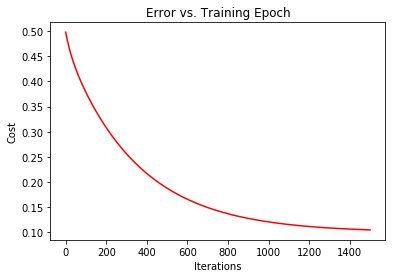

In [11]:
#Plotting the graph
fig, ax = plt.subplots()  
ax.plot(np.arange(iters), cost, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch') 